## Face & Eye Detection using HAAR Cascade Classifiers

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<>:19: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:19: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-8-d4fec3c9b75d>:19: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


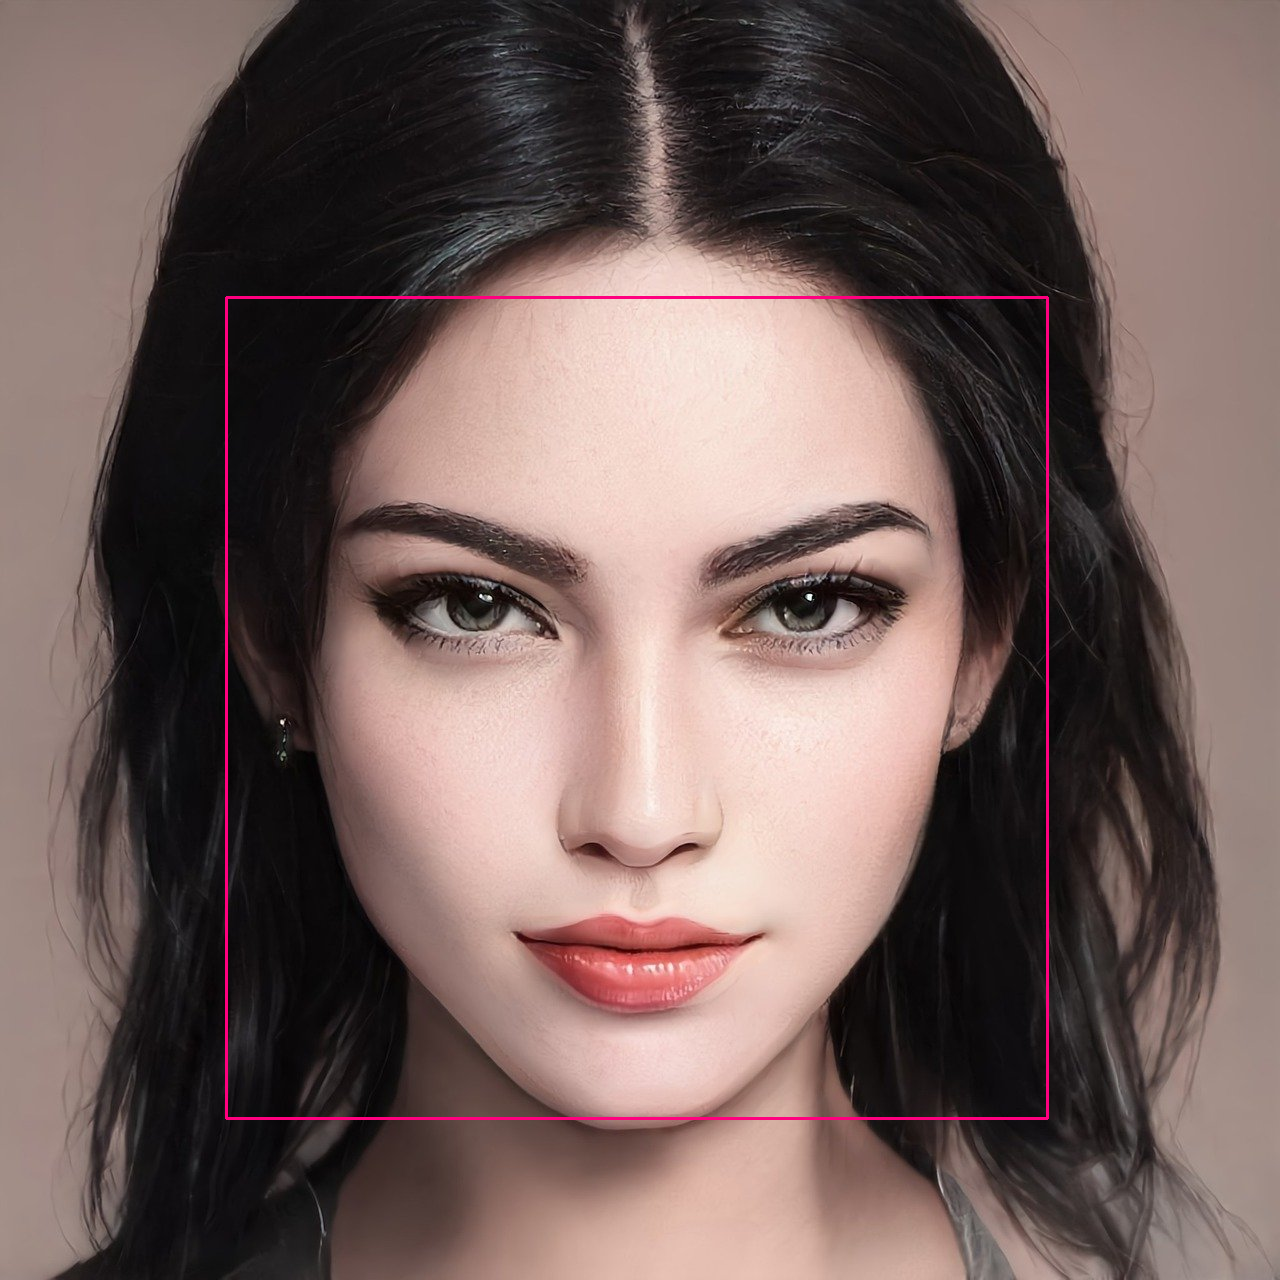

In [8]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow


# We point OpenCV's CascadeClassifier function to where our
# classifier (XML file format) is stored
face_classifier = cv2.CascadeClassifier('/content/drive/MyDrive/Colab Notebooks/Haarcascades/haarcascade_frontalface_default.xml')

# Load our image then convert it to grayscale
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/woman.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Our classifier returns the ROI of the detected face as a tuple
# It stores the top left coordinate and the bottom right coordiantes
faces = face_classifier.detectMultiScale(gray, 1.3, 5)

# When no faces detected, face_classifier returns and empty tuple
if faces is ():
    print("No faces found")

# We iterate through our faces array and draw a rectangle
# over each face in faces
for (x,y,w,h) in faces:
    cv2.rectangle(image, (x,y), (x+w,y+h), (127,0,255), 2)
    cv2_imshow(image)
    cv2.waitKey(0)

cv2.destroyAllWindows()

### Let's combine face and eye detection

<>:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-10-d9118f6c68a8>:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


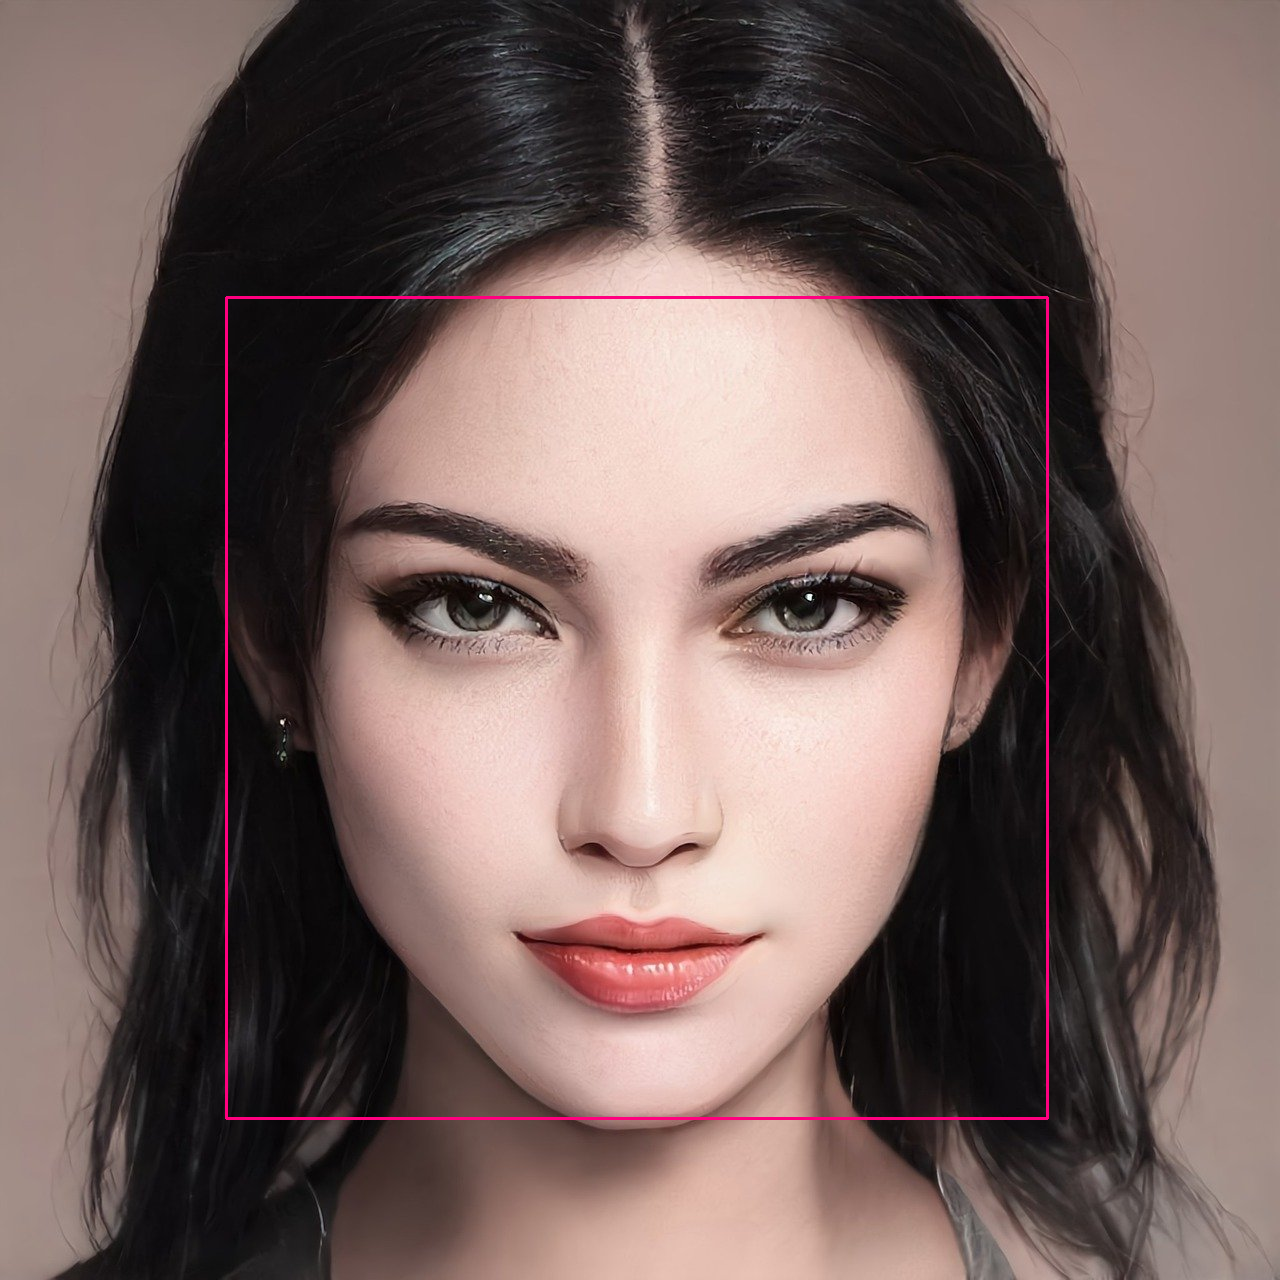

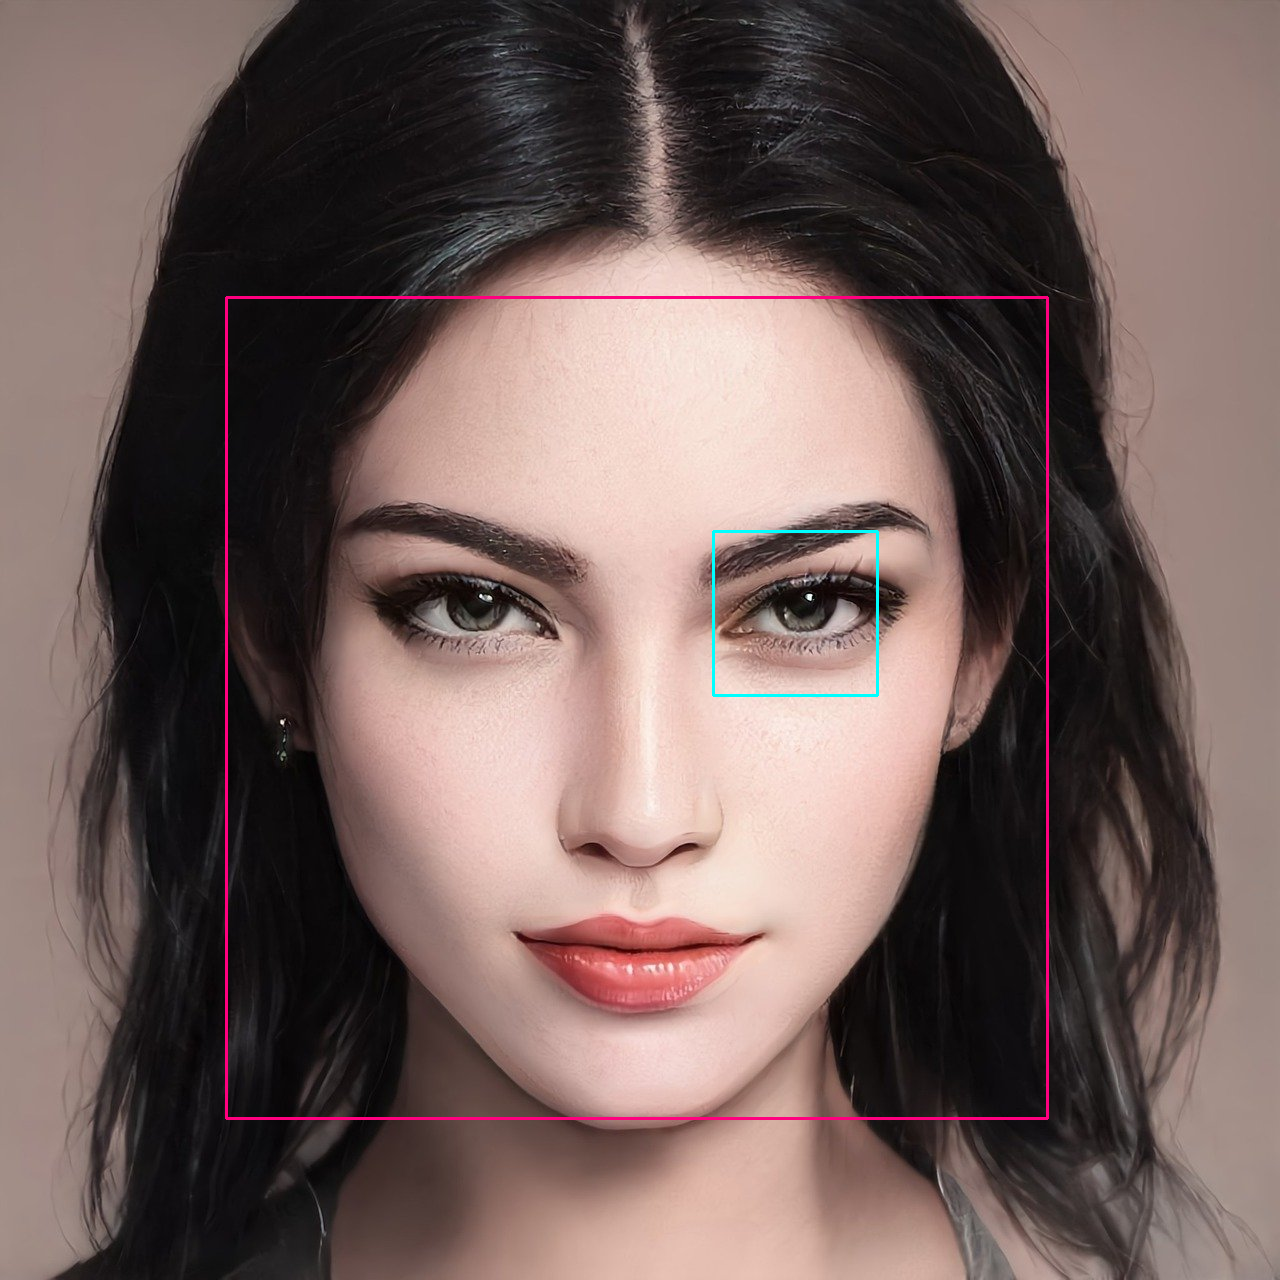

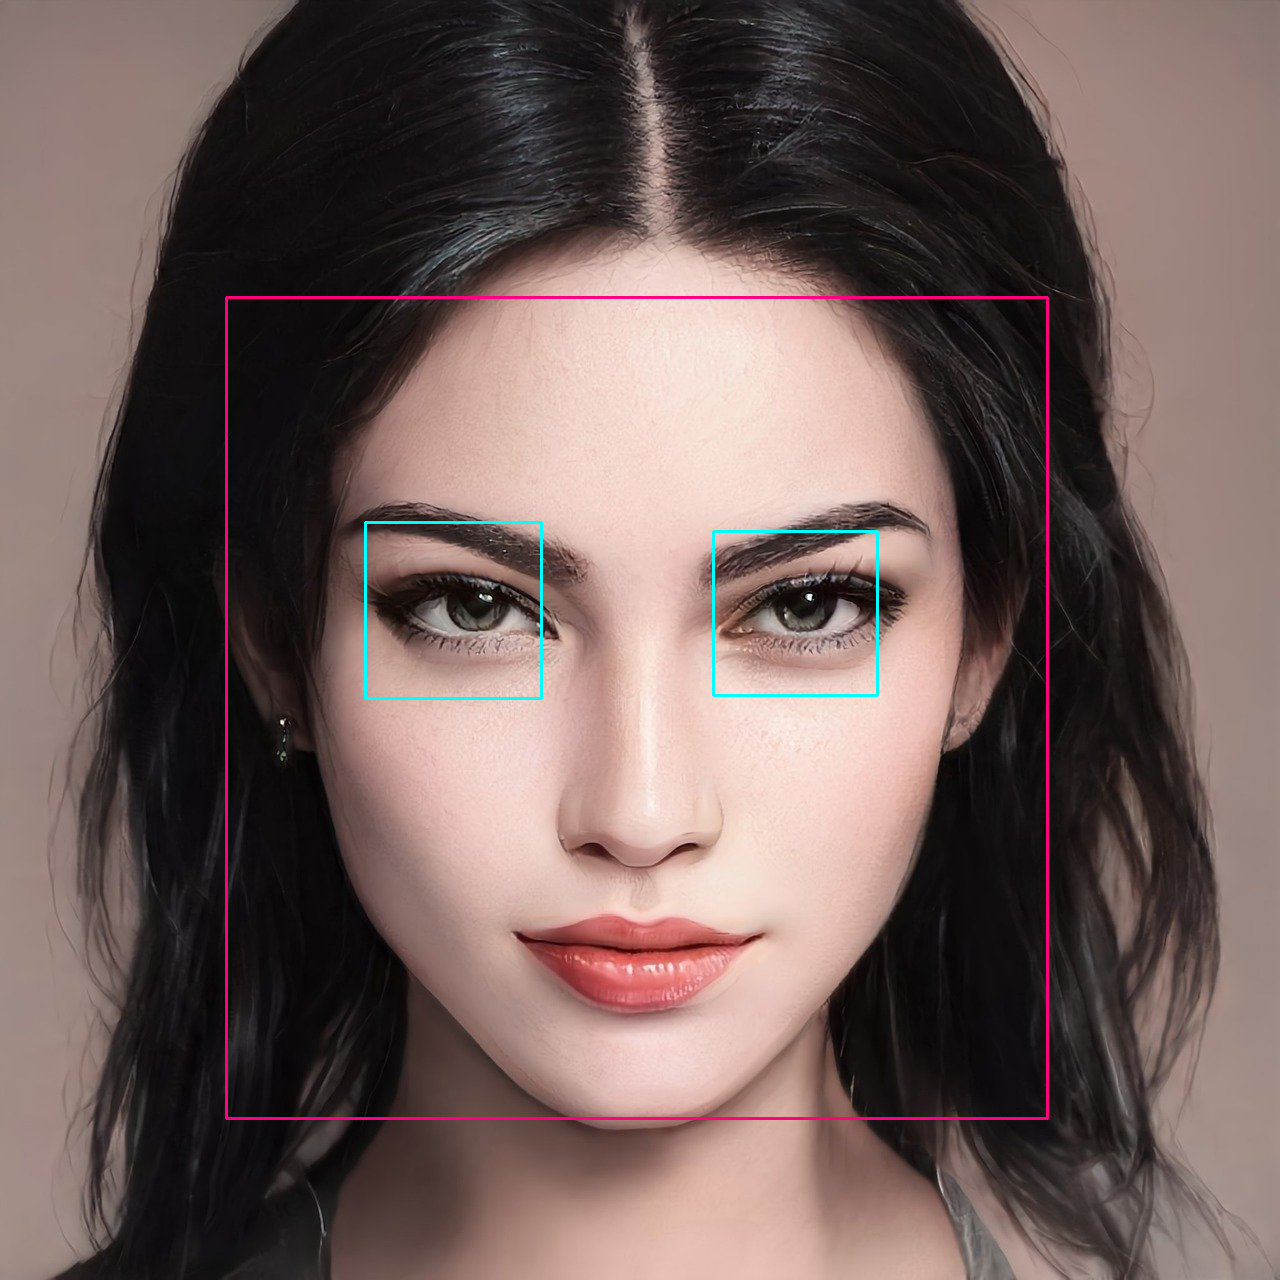

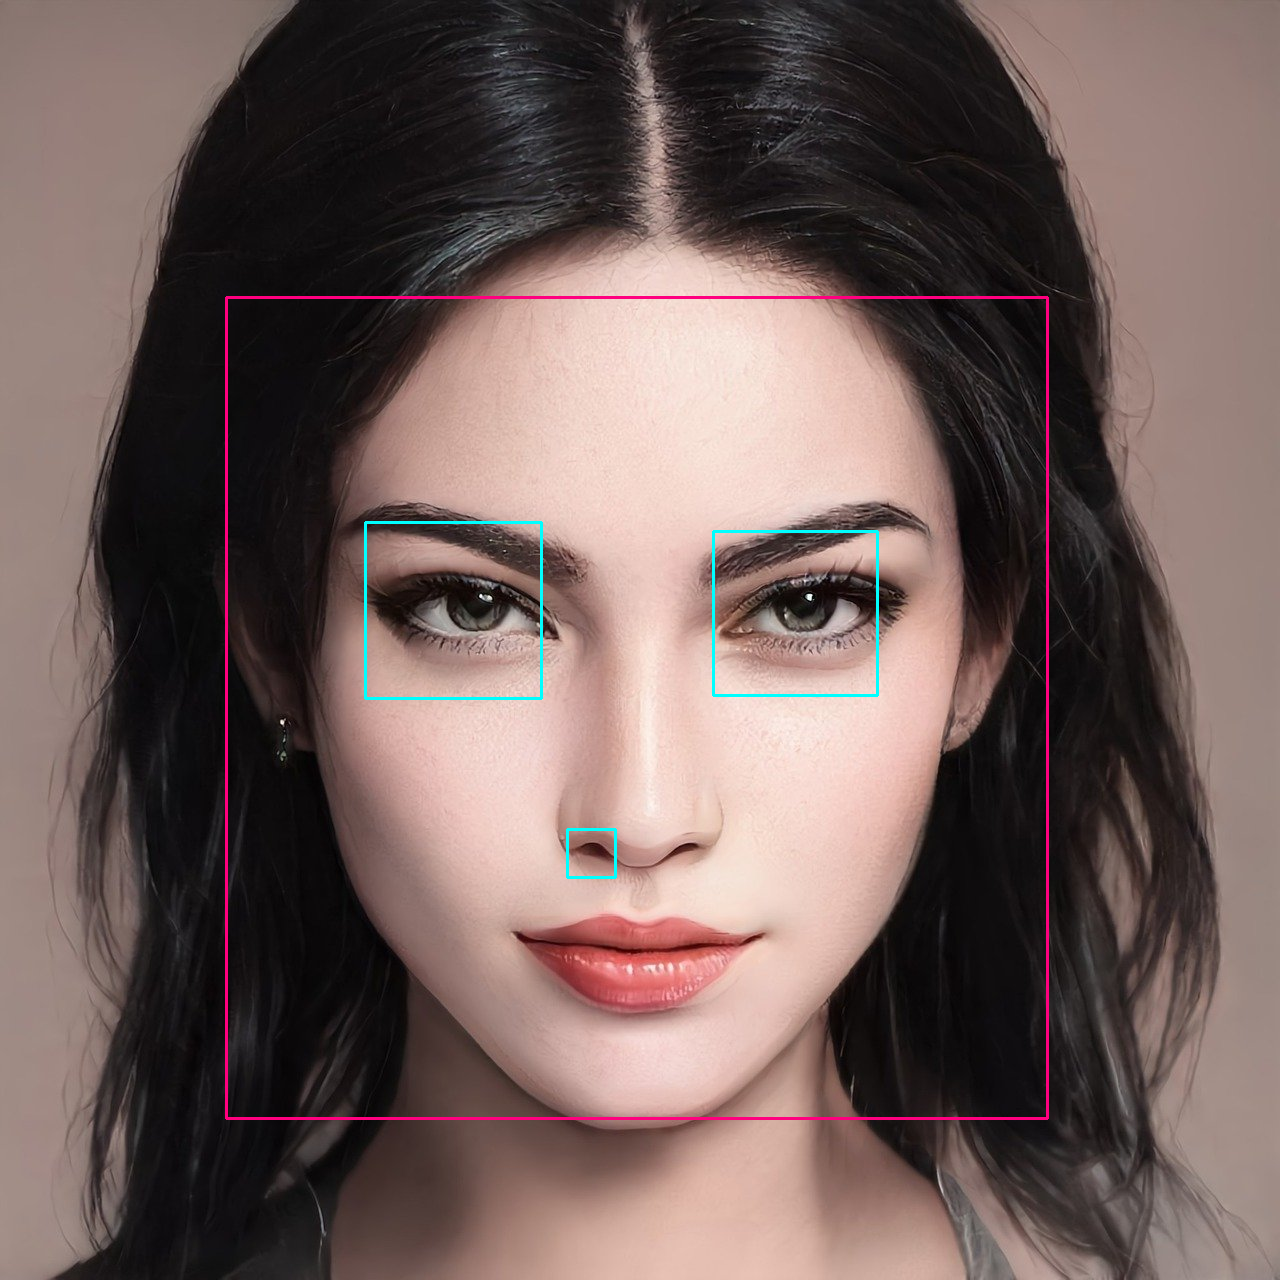

In [10]:
import numpy as np
import cv2

face_classifier = cv2.CascadeClassifier('/content/drive/MyDrive/Colab Notebooks/Haarcascades/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('/content/drive/MyDrive/Colab Notebooks/Haarcascades/haarcascade_eye.xml')

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/woman.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray, 1.3, 5)

# When no faces detected, face_classifier returns and empty tuple
if faces is ():
    print("No Face Found")

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(127,0,255),2)
    cv2_imshow(img)
    cv2.waitKey(0)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)
        cv2_imshow(img)
        cv2.waitKey(0)

cv2.destroyAllWindows()

### Let's make a live face & eye detection, keeping the face inview at all times

In [13]:
import cv2
import numpy as np

face_classifier = cv2.CascadeClassifier('/content/drive/MyDrive/Colab Notebooks/Haarcascades/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('/content/drive/MyDrive/Colab Notebooks/Haarcascades/haarcascade_eye.xml')

def face_detector(img, size=0.5):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    if len(faces) == 0:
        return img

    for (x, y, w, h) in faces:
        x = x - 50
        w = w + 50
        y = y - 50
        h = h + 50
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_classifier.detectMultiScale(roi_gray)

        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 0, 255), 2)

    img = cv2.flip(img, 1)  # Flip the entire frame
    return img

cap = cv2.VideoCapture(0)



In [14]:
cap

< cv2.VideoCapture 0x7f0dd17c5d10>

In [15]:
while True:
    ret, frame = cap.read()
    if not ret:  # Check if the frame was captured successfully
        break

    cv2.imshow('Our Face Extractor', face_detector(frame))
    if cv2.waitKey(1) == 13:  # 13 is the Enter Key
        break

cap.release()
cv2.destroyAllWindows()



### Tuning Cascade Classifiers

*ourClassifier*.**detectMultiScale**(input image, **Scale Factor** , **Min Neighbors**)

- **Scale Factor**
Specifies how much we reduce the image size each time we scale. E.g. in face detection we typically use 1.3. This means we reduce the image by 30% each time it’s scaled. Smaller values, like 1.05 will take longer to compute, but will increase the rate of detection.



- **Min Neighbors**
Specifies the number of neighbors each potential window should have in order to consider it a positive detection. Typically set between 3-6.
It acts as sensitivity setting, low values will sometimes detect multiples faces over a single face. High values will ensure less false positives, but you may miss some faces.  
